In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

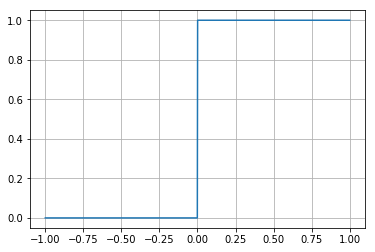

In [60]:
x = np.linspace(-1, 1, 1_000)
plt.plot(x, np.heaviside(x,0))
plt.grid(True)
plt.show()

In [61]:
#def step_ramp(x):
#    if x < 0.5:
#        return 0.5
#    else:
#        return (x - 0.5) + 0.5

def step_ramp(x, turning_point, flat_part, inclination):
    return flat_part + np.heaviside(x-turning_point,0) * inclination * (x-turning_point)

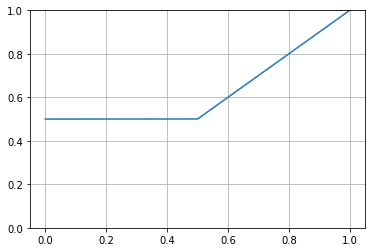

In [71]:
x = np.linspace(0, 1, 10_000)
plt.plot(x, step_ramp(x, 0.5, 0.5, 1))
plt.grid(True)
plt.ylim([0, 1])
plt.show()

In [72]:
y = step_ramp(x, 0.5, 0.5, 1)
y_noisy = y + np.random.uniform(low=-0.5, high=+0.5, size=y.shape)

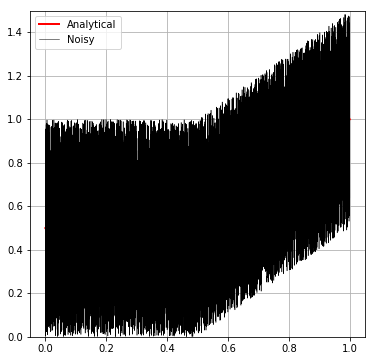

In [73]:
plt.figure(figsize=(6,6))
plt.plot(x, y, color='r', linestyle='-', linewidth=2, label='Analytical')
plt.plot(x, y_noisy, color='k', linestyle='-', linewidth=0.5, label='Noisy')
plt.grid(True)
plt.ylim([0, 1.5])
plt.legend(loc='best')
plt.show()

In [74]:
lineAdjusted, pcov = scipy.optimize.curve_fit(step_ramp, x, y_noisy, p0=[0.6, 0.4, -1])
turning_point, flat_part, inclination = lineAdjusted
print('{:15s}{:^20s} : {:^20s}'.format(' ', 'Original values', 'New values'))
print('{:15s} {:^20f} : {:^20f}'.format('turning_point', 0.5, turning_point))
print('{:15s} {:^20f} : {:^20f}'.format('flat_part', 0.5, flat_part))
print('{:15s} {:^20f} : {:^20f}'.format('inclination', 1, inclination))

                 Original values    :      New values     
turning_point         0.500000       :       0.505058      
flat_part             0.500000       :       0.497967      
inclination           1.000000       :       1.025821      


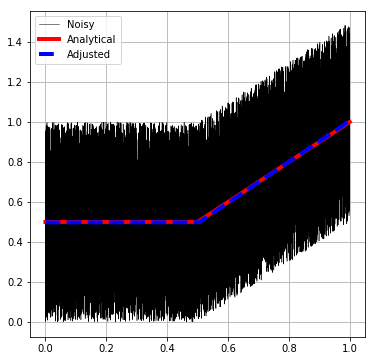

In [75]:
plt.figure(figsize=(6,6))
plt.plot(x, y_noisy, color='k', linestyle='-', linewidth=0.5, label='Noisy')
plt.plot(x, y, color='r', linestyle='-', linewidth=4, label='Analytical')
plt.plot(x, step_ramp(x, *lineAdjusted), color='b', linestyle='--', linewidth=4, label='Adjusted')
plt.grid(True)
plt.legend(loc='best')
plt.show()